# Unbounded grids

## p3: band-limited interpolation

In [1]:
h = 1
xmax = 10
x = -xmax:h:xmax                     # computational grid
xx = -xmax-h/20:h/10:xmax+h/20       # plotting grid

funs = [
    (x -> float(x == 0), "discrete delta"),
    (x -> float(abs(x) <= 3), "square wave"),
    (x -> max(0, 1 - abs(x) / 3), "tent function")
]
results = []
for (u,label) in funs
    v = u.(x)
    pp = [ sum(v[i] * sinc((ξ-x[i]) / h) for i in eachindex(x)) for ξ in xx ]
    push!(results, (;v, pp, label))
end

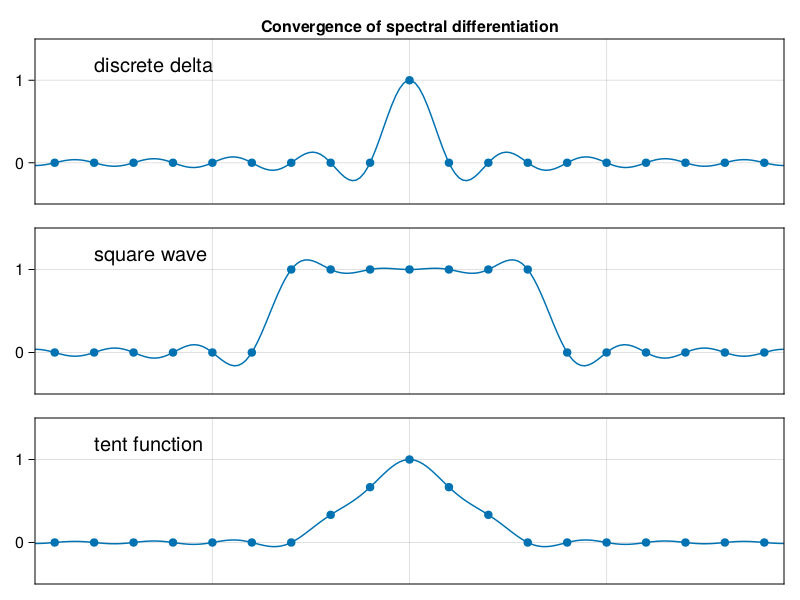

In [2]:
using CairoMakie 

fig = Figure()
nf = length(funs)
for (i,r) in enumerate(results)
    ax = Axis(
        fig[i, 1],
        xticksvisible=false, xticklabelsvisible=false,
        yticks=[0,1]
    )
    (i==1) && (ax.title = "Convergence of spectral differentiation")
    scatter!(x, r.v)
    lines!(xx, r.pp)
    limits!(ax, -xmax+0.5, xmax-0.5, -0.5, 1.5)
    text!(-xmax+2, 1.05, text=r.label)
end
fig

## Gibbs phenomenon

In [3]:
xmax = 10
xx = range(-xmax,xmax,600)       # plotting grid

h = [1, 1/2, 1/6]
results = []
for h in h
    x = -xmax:h:xmax                     # computational grid
    v = @. float(abs(x) ≤ 3)    
    pp = [ sum(v[i] * sinc((ξ-x[i]) / h) for i in eachindex(x)) for ξ in xx ]
    push!(results, (;x, v, pp))
end

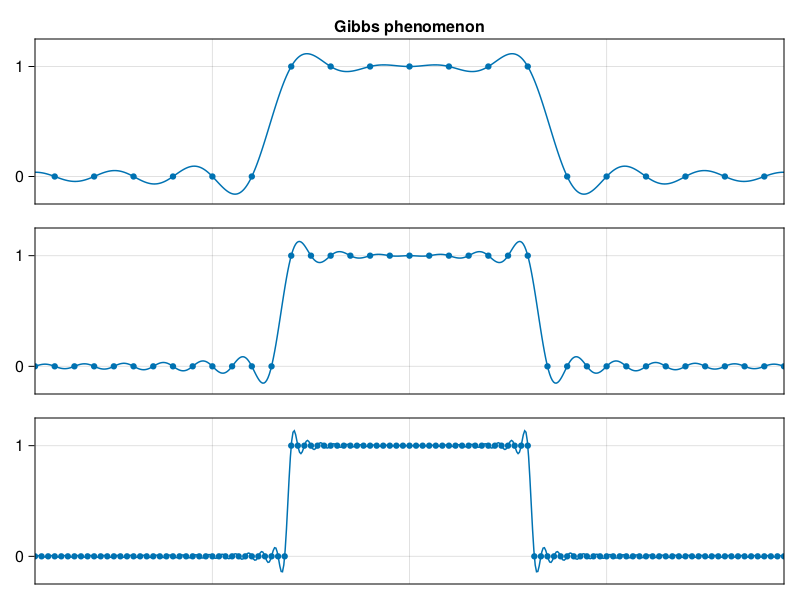

In [4]:
fig = Figure()
for (i,r) in enumerate(results)
   ax = Axis(
        fig[i, 1],
        xticksvisible=false, xticklabelsvisible=false,
        yticks=[0,1]
    )
    (i==1) && (ax.title = "Gibbs phenomenon")
    scatter!(r.x, r.v, markersize=9)
    lines!(xx, r.pp)
    limits!(ax, -xmax+0.5, xmax-0.5, -0.25, 1.25)
end
fig